# Homework-1

# Problem-1

In [1]:
#Importing Necessary Libraries
import numpy as np
from numpy import linalg as LA
import scipy as sp
from scipy.sparse import linalg
import networkx as nx

In [2]:
#Let's initialize a sample adjacency matrix for testing the below functins
#A is an 9*9 udirected unweighted matrix
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])


#Creating adjacency matrix using the networkx for centrality functions
adjMatrix= nx.from_numpy_matrix(A)
print ("Adjacency Matrix:")
print A

Adjacency Matrix:
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


# Degree of Node

In [3]:
"""
    Function to define degree of the undirected unweighted graph
    I am using A here to test the results since i have used numpy functions , we can also use above converted 
    nx matrix as well

"""
def degree(Adj_matrix):
    #converting array into numpy matrix
    G=np.matrix(Adj_matrix)
    #temporary array to store degree values
    nodes_degree=[]
    #summing up the row entry(each node) for degree by first converting it to list
    d=np.sum(G.tolist(),axis=1)
    for i in range (len(d)):
        #storing degree values in above mentioned array
        nodes_degree.append(d[i])  
    #returning list of degrees of nodes
    return(list(nodes_degree) ) 

#Display results
print("Degree of matrix is given by:")

degree(A)

Degree of matrix is given by:


[3, 2, 3, 4, 4, 4, 4, 3, 1]

# Betweenness Centrality

In [4]:
""" Function to Calculate Between Centrality:
    For any node 'v' gives the sum of the fraction of all-pairs shortest paths that pass through 'v'
    
    G: Given Adjacency Matrix
    nodes: nodes of matrix
    
    Algorithm Used:
    Breadth First Search algorithm to find the shortest paths till terminal nodes from s(node) and then stepping 
    back via the saved predecessor nodes to output the paths for the terminal nodes and all the previous nodes. 
    Thus, i have to go back to s from each node t through all the nodes v which are on the shortest path 
    between s and t.We can add up the shortest paths at that point, rather than saving them all and then checking 
    whether v is a member.
    
    Following is the Algorithm i have used-
    
    use of a recursive step in the backward phase to allow direct calculation of the ratios for each v on 
    the basis of its successor nodes on the shortest paths to every following t.
    1) δ(t) = 0 if t is a terminal node
    2) Increment δ(v) every time we reach v from a node w on the backward phase(v immediately precedes w in a 
    shortest path from s) based on the values of δ(w).
    3) After we have finished with all the w values, δ(v) can be straightforwardly accumulated into CB(v).

    Here is revised pseudocode under this assumption:
    1. For every node v in V, set betweenness = 0.
    2. For each node s in V :
        1. set δ(v) to zero for all nodes v in V .
        2. Use the BFS algorithm 
        while Q is not empty, do:
            1. dequeue v from Q and push v onto a stack S
            2. For each node w such that is an edge in E from v to w, do
                1. if dist[w] is infinity, then
                   set dist[w] to dist[v] + 1
                   enqueue w
                2. if dist[w] = dist[v]+1 then
                   set σ(s, w) to σ(s, w) + σ(s, v)
                   append v to Pred[w]
            3. while S is not empty, pop w off S
                1. for all nodes v in Pred(w) set δ(v) to δ(v) + MAGIC(δ(w)).
                2. unless w = s, set betweenness(w) = betweenness(w) + δ(w)  
                
    3. betweenness gives end result
    
    ****Reference:http://www.cl.cam.ac.uk/teaching/1617/MLRD/handbook/brandes.pdf***
    
"""
def betweenness_centrality(Adj_matrix): 
    #creates a new dictionary 
    #set betweenenss=0 for every node initially
    betweenness = dict.fromkeys(Adj_matrix, 0.0)  
    #fetching nodes from matrix Adj_matrix
    nodes = Adj_matrix.nodes
    #for loop to calculate centrality measure for every node individually and at last storing them in dictionary
    for s in nodes:
        #empty list (in form of stack)
        Stack = []
        #empty dictionary
        predessor = {}
        #looping for each vertex in graph
        for v in Adj_matrix:
            predessor[v] = []
        #setting sigma  0 for  nodes initially
        sigma_val = dict.fromkeys(Adj_matrix, 0.0) 
        #empty dictionary
        Dist = {}
        sigma_val[s] = 1.0
        Dist[s] = 0
        Queue = [s]
        #for BFS
        #Use the BFS algorithm while Queue is not empty, do:
        while Queue:  
            #dequeue top element(node) from Q and push v onto stack S
            v = Queue.pop(0)
            Stack.append(v)
            #distance 0f v
            d = Dist[v] #distance
            sigmav = sigma_val[v]
            #For each node g such that is an edge in G from g to v, do
            for g in Adj_matrix[v]:
                if g not in Dist:
                    #enqueue
                    Queue.append(g)
                    #set distance of g to (d+1)
                    Dist[g] = d + 1
                    # this gives shortest path
                if Dist[g] == d + 1: 
                    #setting σ(s, w) to σ(s, w) + σ(s, v)
                    sigma_val[g] += sigmav
                    #add predessors(append g to Pred[g])
                    predessor[g].append(v) 
        #calculation of centrality  
        delta = dict.fromkeys(Stack, 0)
        #while stack is not empty, pop g off stack
        while Stack:
            g = Stack.pop()
            magic = (1.0 + delta[g]) / sigma_val[g]
            #for all nodes v in Pred(g) set δ(v) to δ(v) + coefficient
            for v in predessor[g]:
                delta[v] += sigma_val[v] * magic
            if g != s:
                betweenness[g] += delta[g]
    #Scaling 
    scale = 0.5
    for b in betweenness:
         betweenness[b] *= scale
    b_centrality=list(betweenness.values())
    #Returning centrality values in form of list(As mentioned in Problem Requirments)
    return b_centrality

#Checking the above function
print ("Betweenness Centrality of the above matrix using above function is:") 
print betweenness_centrality(adjMatrix)


#Validating the above result against Networkx library Function
print ("Betweenness Centrality of the above matrix using Networkx function is:") 
print nx.betweenness_centrality(adjMatrix,normalized=False)

Betweenness Centrality of the above matrix using above function is:
[3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]
Betweenness Centrality of the above matrix using Networkx function is:
{0: 3.0, 1: 0.0, 2: 3.0, 3: 15.0, 4: 6.0, 5: 6.0, 6: 7.0, 7: 0.0, 8: 0.0}


# Closeness Centrality

In [5]:
""" Function for closeness Centrality:
    For any node node 'u', it is the reciprocal of the  shortest path distance to 'u' over all 'n-1' reachable nodes.
    
    G: Given Adjacency Matrix
    nodes: nodes of matrix
    
    Algorithm Used:
    1)Given G,s
    2)seen ← {s}
    3) visit ← {s}
    4) visitNext ← ∅
    5)
    6) while visit not= ∅
    7) for each v ∈ visit do
    8) for each n ∈ neighborsv do
    9) if n not∈ seen then
    10) seen ← seen ∪ {n}
    11) visitNext ← visitNext ∪ {n}
    12) do BFS computation on n
    13) visit ← visitNext
    14) visitNext ← ∅
    
    ***Refrence:https://db.in.tum.de/~kaufmann/papers/msbfs.pdf***
    
"""
def closeness_centrality(Adj_matrix):
    nodes=list(Adj_matrix.nodes)
    closeness_c = {}
    for n in nodes:
        #
        s=[]
        #Starting node for path 
        source=nodes[n]
        #number of visited nodes in BFS
        seen={}   
        #current level of node (visit)
        current_level=0                 
        # dict of nodes to check nodes at the  next level
        next_level={source:1}  
        while next_level:
            #go to this level(neighbor's)
            move_to_this_level=next_level 
            #starting new list 
            next_level={}         
            for m in move_to_this_level:
                if m not in seen:
                    # setting level of vertex m
                    seen[m]=current_level 
                    # adding the neighbors of vertex m
                    next_level.update(Adj_matrix[m]) 
            #updating current level
            current_level=current_level+1
        #sum of all shrtest paths
        s=sum(seen.values())
        if s > 0.0:
            closeness_c[n] = (len(Adj_matrix) - 1.0) / s
            #closeness_centrality[n] = 0.0
            
    #getting the centrality values in a list
    c_centrality=list(closeness_c.values())
    return c_centrality

#Checking the above function
print ("closeness Centrality of the above matrix using above function is:") 
print closeness_centrality(adjMatrix)


#Validating the above result against Networkx library Function
print ("closeness Centrality of the above matrix using Networkx function is:") 
print nx.closeness_centrality(adjMatrix)

closeness Centrality of the above matrix using above function is:
[0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]
closeness Centrality of the above matrix using Networkx function is:
{0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


# Eigenvector Centrality

In [6]:
""" computes the centrality for a node based on the centrality of its neighbors
    G :Adjacency Matrix
    
    Algorithm Used:
    It uses the SciPy sparse eigenvalue solver (ARPACK) to find the largest eigenvalue or eigenvector pair.
    I have used max iterations of 50(random)
"""

def eigenvector_centrality(Adj_matrix):
    values={}
    #i am using Scipy to get largest postive values
    M = nx.to_scipy_sparse_matrix(Adj_matrix, nodelist=list(Adj_matrix), weight=None,dtype=float) 
    #getting eigen values
    e_value, e_vector = linalg.eigs(M.T, k=1, which='LR',maxiter=50, tol=0)
    #largest values
    largest_value = e_vector.flatten().real
    #normlizing the values
    norm = sp.sign(largest_value.sum()) * sp.linalg.norm(largest_value)
    #saving the eigen values in dict
    final_val=dict(zip(Adj_matrix, largest_value / norm))
    
    #returning list
    return list(final_val.values())



#Checking the above function
print ("eigenvector Centrality of the above matrix using above function is:") 
print eigenvector_centrality(adjMatrix)


#Validating the above result against Networkx library Function
print ("eigenvector Centrality of the above matrix using Networkx function is:") 
print nx.eigenvector_centrality(adjMatrix)

eigenvector Centrality of the above matrix using above function is:
[0.19574879570918463, 0.11168370323986701, 0.19574879570918463, 0.37874802533567892, 0.46808547631042224, 0.46808547631042224, 0.40997938953295321, 0.38402038384110471, 0.11695606174529276]
eigenvector Centrality of the above matrix using Networkx function is:
{0: 0.1957540414970864, 1: 0.1116880543296416, 2: 0.19575404149708636, 3: 0.378751077373384, 4: 0.4680839101306905, 5: 0.4680839101306905, 6: 0.4099765880693859, 7: 0.3840179229632457, 8: 0.11695489991950335}


# Problem-2


In [7]:
#Importing Libraries as needed
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Let's initialize a sample adjacency matrix for graph Plotting 
B = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

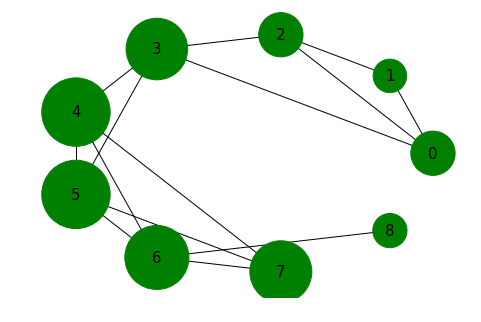

In [9]:
#Function to display graph
#i have adjusted the node_size on basis of its eigen vector value
#i have multiplied the eigen vector values to 10000 to make it visible in graph
def create_graph(Adj_Matrix):
    #Getting numpy matrix
    H = nx.from_numpy_matrix(Adj_Matrix)
    #getting eigen vector centrality values for nodes
    eigen=nx.eigenvector_centrality(H)
    G=nx.Graph(H)
    nx.draw(G,pos=nx.circular_layout(G),with_labels=True,nodelist=eigen.keys(),font_size=15,node_color='g',node_size=[int(10000*round(float(w),3),) for w in eigen.values()])
    plt.show()
    
    
#Display graph
create_graph(B)
#node size of node 0 and node 2 is same since it is getting same eigen centrality
#Similarly,size of node 4 and node 5 is same since it is getting same eigen centrality